## E-Commerce Sales Performance Analysis Using Python And Excel

## Data Analysis And Visualisation

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import seaborn as sns


In [18]:
df = pd.read_csv('../Data/data.csv' ,encoding='ISO-8859-1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Cleaning Data

In [20]:
# Dropping Duplicates if any
df.drop_duplicates(inplace = True)  

# Checking for columns having null value
df.isnull().any(axis = 0)    
''' Here there are two columns having Null Values : 'CustomerID' and 'Description' '''

# Dropping Null Value
df.dropna(subset=['CustomerID' , 'Description'] , inplace = True)   

# Rechecking For Null values
df.isnull().any(axis= 0)  

# Converting Data Types Of Appropriate Columns
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('int64')

# Checking For Negative Values in Appropriate Columns
df.select_dtypes(['int64' , 'float64']).where(lambda x : x < 0).count()

# Updating Dataframe by removing negative values from Quantity Column
df = df[df['Quantity'] > 0]



### Adding Columns 

In [21]:
# Adding Sales Column
df['sales'] = df['Quantity'] * df['UnitPrice']

df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Separating sales Greater than 0
grt_0_sales = df[df['sales'] > 0]

### EDA And Visualization

##### Monthly Sales Trend (Line Chart)

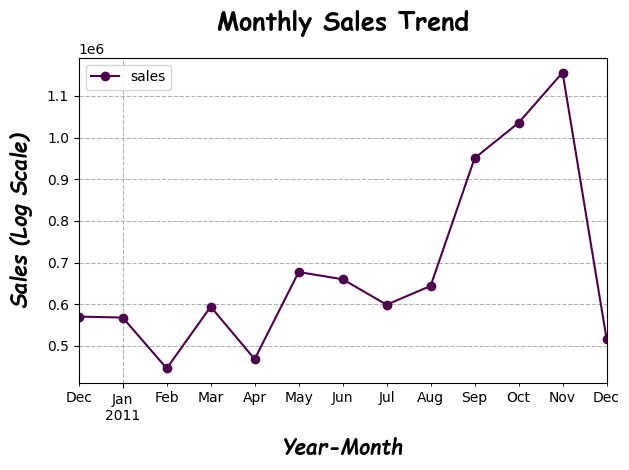

In [22]:
monthly_sales = df.groupby('YearMonth')['sales'].sum().reset_index()

ax = plt.gca()
monthly_sales.plot( ax = ax , x ='YearMonth' , y = 'sales' , marker = 'o' , kind = 'line' , legend = True ,colormap = 'BuPu_r')
ax.yaxis.set_major_locator(tck.MaxNLocator(nbins = 7 , prune = 'upper' , min_n_ticks = 6))

title_dict = {'family' : 'Comic Sans MS' , 'color' : 'black' , 'fontweight' : 'bold' , 'fontsize' : 18}
label_dict = {'family' : 'Comic Sans MS' , 'color' : 'black' , 'weight' : 'bold' , 'size' : 15 , 'fontstyle' : 'italic'}

plt.title('Monthly Sales Trend' , fontdict = title_dict , pad= 20)
plt.ylabel('Sales (Log Scale)' , fontdict= label_dict, labelpad = 10)
plt.xlabel('Year-Month' , fontdict= label_dict , labelpad = 10)
plt.grid(True , linestyle = '--' , alpha = 1)
plt.savefig('../Reports/Charts/monthly_sales_trend.png')
plt.tight_layout()
plt.show()


#### Horizontal Bar Plot

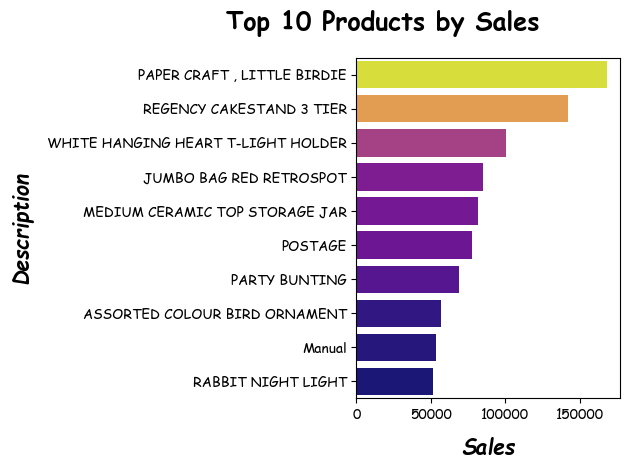

In [23]:
fig , axs = plt.subplots()
top_sales = df.groupby('Description' ).agg({'sales':'sum'} ).nlargest(10 , columns = 'sales').reset_index()
tick_dict = {'labelfontfamily' : 'Comic Sans MS' , 'labelcolor' : 'black'  , 'labelsize' : 10}

ax = sns.barplot(data = top_sales , y = 'Description' , x = 'sales', palette = 'plasma', hue = 'sales', legend = False)
plt.title('Top 10 Products by Sales' , fontdict = title_dict, pad = 20 , x = 0.1)
ax.tick_params(axis = 'both' , **tick_dict)
ax.set_xlabel('Sales' , labelpad = 10 , fontdict = label_dict)
ax.set_ylabel('Description' , labelpad = 10 , fontdict = label_dict)
plt.tight_layout()
plt.savefig('../Reports/Charts/top_10_products_sales.png')
plt.show()

#### Country Wise Sales 

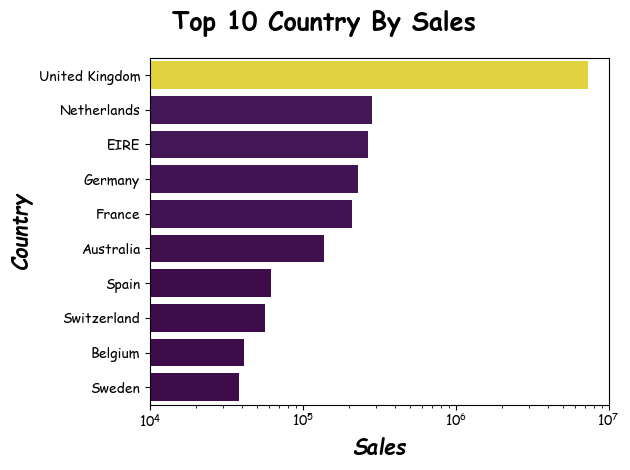

In [24]:
country_sale = df.groupby('Country').agg({'sales' : 'sum'}).sort_values(by = 'sales' , ascending= False).reset_index().head(10)
country_sale

# fig , axs = plt.subplots()

barplt = sns.barplot(data = country_sale , x = 'sales' , y = 'Country'  , palette = 'viridis' , hue = 'sales' , legend = False)
plt.title('Top 10 Country By Sales' , fontdict= title_dict, pad = 20 , x = 0.38)
barplt.tick_params(axis = 'both' , **tick_dict)
barplt.set_ylabel('Country' , **label_dict)
barplt.set_xlabel('Sales' , **label_dict)
barplt.set_xscale('log')
barplt.set_xlim(1e4 , 1e7)
plt.tight_layout()
plt.savefig('../Reports/Charts/top_10_countries_sales.png')
plt.show()

#### Sales Distribution

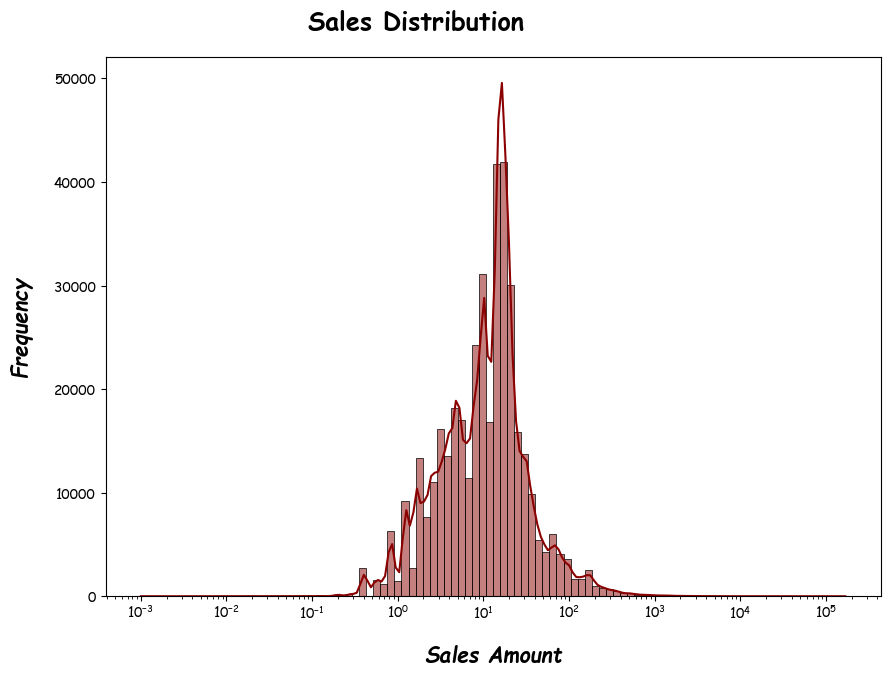

In [31]:
fig , axs = plt.subplots(figsize = (10,7))
sns.histplot(data= grt_0_sales , x = 'sales' , log_scale= True , bins = 100 , color = 'darkred' , kde = True   , legend = False)
plt.title('Sales Distribution' , fontdict= title_dict, pad = 20 , x = 0.4)
axs.tick_params(axis = 'both' , **tick_dict)
axs.set_ylabel('Frequency' , **label_dict , labelpad = 15)
axs.set_xlabel('Sales Amount' , **label_dict , labelpad = 15)
plt.savefig('../Reports/Charts/sales_distribution.png')
plt.show()

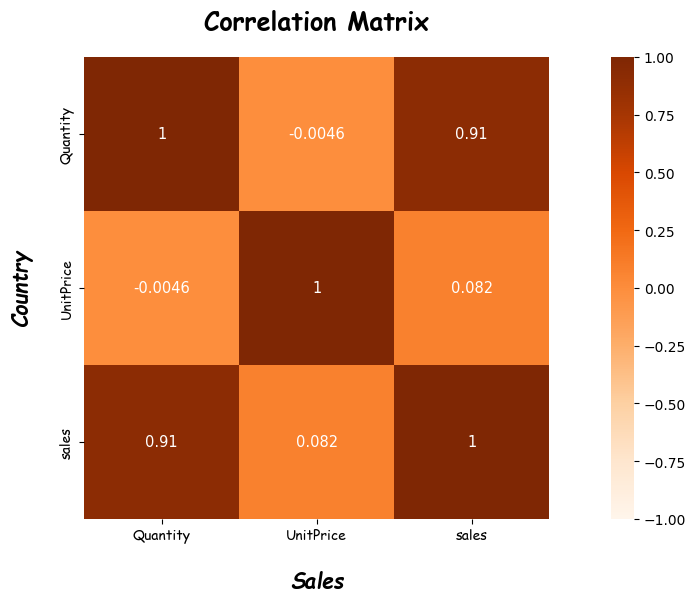

In [34]:
fig , axs = plt.subplots(figsize = (8,6))
sns.heatmap(df[['Quantity' , 'UnitPrice' , 'sales']].corr() , ax = axs , annot= True , vmin = -1 , vmax = 1 , cmap = 'Oranges' , annot_kws={'size' : 10.5}, cbar_kws={'pad' : 0.1})
plt.title('Correlation Matrix' , fontdict = title_dict, pad = 20 )
axs.tick_params(axis = 'both' , **tick_dict)
axs.set_ylabel('Country' , **label_dict , labelpad= 19)
axs.set_xlabel('Sales' , **label_dict ,labelpad= 19)
plt.savefig('../Reports/Charts/correlation_matrix.png')
plt.show()

#### Sales By Months And Country 

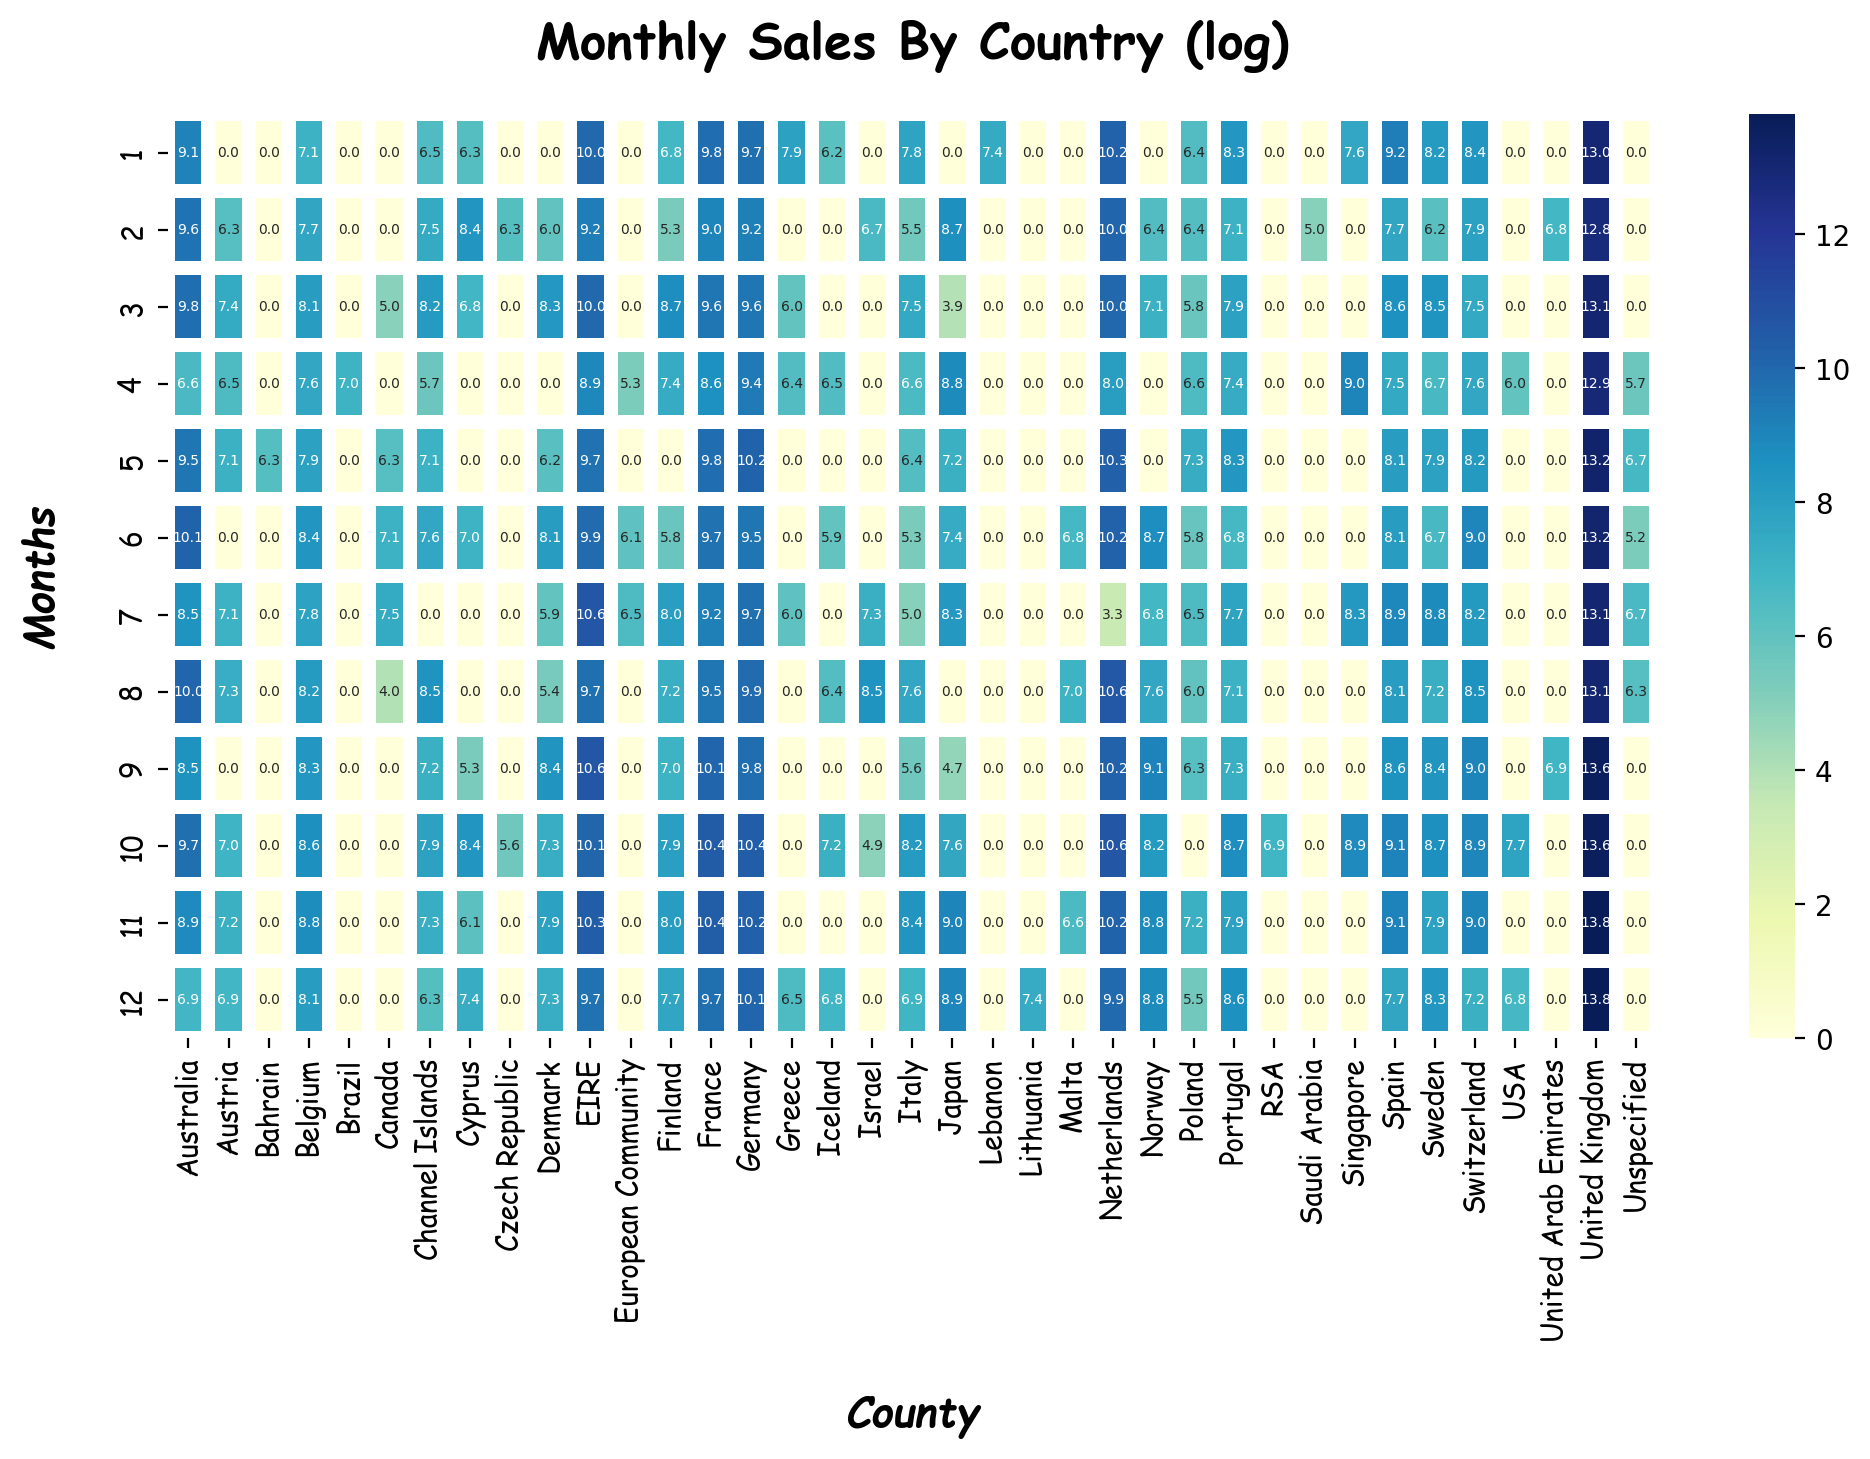

In [27]:
fig , axs = plt.subplots(figsize = (12 ,6) , dpi =200)
pivot = df.pivot_table(columns = 'Country' , index = 'Month' , values= 'sales' , aggfunc= 'sum').fillna(0)
pivot = np.log1p(pivot)

sns.heatmap(pivot , cmap = 'YlGnBu'  , linewidths = 5 , annot = True , fmt= '.1f' , annot_kws={'size': 5} , cbar_kws={'pad' : 0.05})
plt.title('Monthly Sales By Country (log)' , fontdict = title_dict, pad = 20 )
axs.tick_params(axis = 'both' , **tick_dict)
axs.set_ylabel('Months' , **label_dict , labelpad= 19)
axs.set_xlabel('County' , **label_dict ,labelpad= 19)
plt.savefig('../Reports/Charts/month_country_heatmap.png')
plt.show()

#### Customer Segmentation

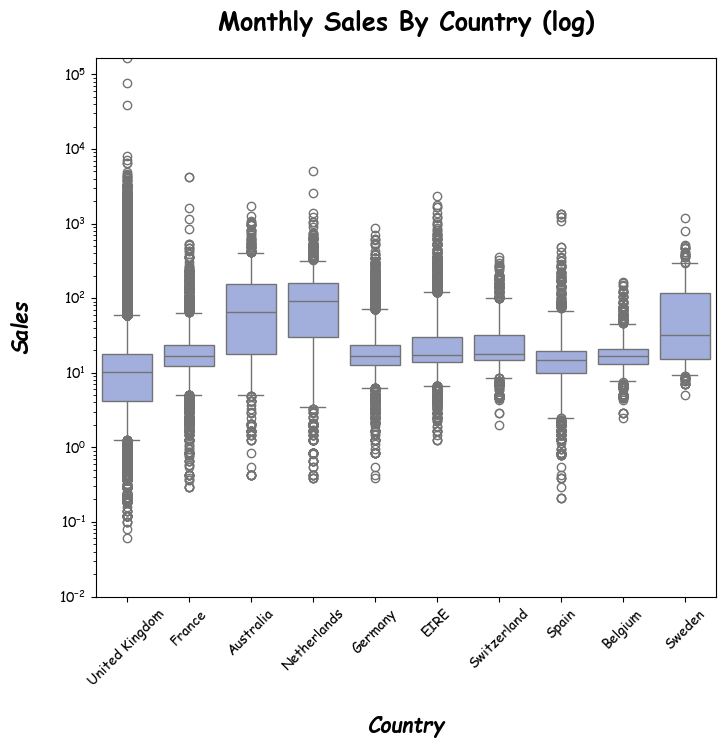

In [35]:
fig , axs = plt.subplots(figsize = (8,7))

sns.boxplot(data = df[df['Country'].isin(country_sale.Country)] , x = 'Country' , y = 'sales' , log_scale= True , color= "#98a9e6cc" , dodge= True , whis = [5 , 95] ,  showfliers = True, ax= axs)
axs.set_ylim(0.01 , df['sales'].quantile(1) )
plt.title('Monthly Sales By Country (log)' , fontdict = title_dict, pad = 20 )
axs.tick_params(axis = 'y' , **tick_dict)
axs.tick_params(axis = 'x' , rotation = 45 ,**tick_dict)
axs.set_ylabel('Sales' , **label_dict , labelpad= 19)
axs.set_xlabel('Country' , **label_dict ,labelpad= 19)
plt.savefig('../Reports/Charts/country_sales_boxplot.png')
plt.show()

#### Time Trend Decomposition

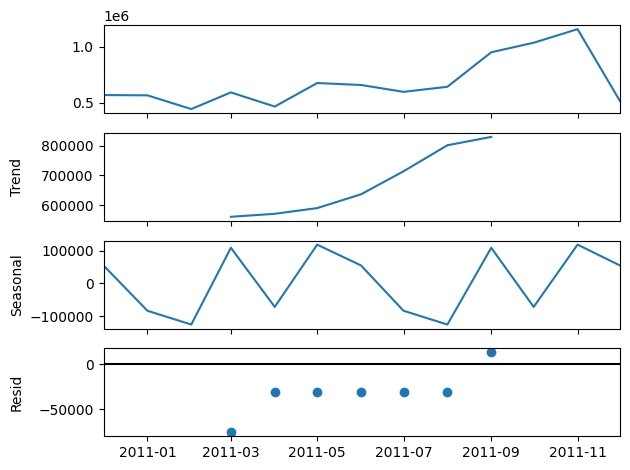

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
temp_monthly_sales = monthly_sales.set_index('YearMonth')

result = seasonal_decompose(temp_monthly_sales.to_timestamp() , model = 'additive' , period= 6)
fig = result.plot()
fig.align_labels(fig.axes)
plt.savefig('../Reports/Charts/sales_seasonality.png')
plt.show()

## Exporting to Excel

In [36]:
with pd.ExcelWriter('../Reports/SummaryReport.xlsx' , engine = 'openpyxl') as writer:
    df.to_excel( writer , sheet_name= 'CleanedData')
    monthly_sales.to_excel(writer , sheet_name= 'MonthlySales')
    top_sales.to_excel(writer , sheet_name= 'Top_Sales')